# BaseLine Model

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['figure.dpi'] = 80
# from sklearn.calibration import calibration_curve, CalibrationDisplay
import warnings
warnings.filterwarnings('ignore')
import pickle
import os 
from joblib import dump, load

In [3]:
train_set = pd.read_csv('./train_set.csv')

In [22]:
df1

,Angle_from_net,Distance_from_net,Is_goal
0,10.007980,34.525353,0
1,0.000000,10.000000,0
2,4.085617,14.035669,0
3,46.636577,49.517674,0
4,2.045408,28.017851,0
...,...,...,...
331224,30.256437,13.892444,1
331225,19.290046,21.189620,0
331226,9.462322,24.331050,0
331227,3.652223,47.095647,0


In [7]:
df1=pd.DataFrame(train_set[["Distance_from_net","Is_goal"]])
df=df1.dropna()
print(df)
#     train_set.drop(a)
distance_input=df["Distance_from_net"]
isGoal_output=df["Is_goal"]
X_train, X_test, y_train, y_test = train_test_split(distance_input, isGoal_output, test_size=0.3, random_state=42)
X_train= np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
lg=LogisticRegression()
print(X_train)
lg.fit(X_train,y_train)
prediction=lg.predict(X_test)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f = f1_score(y_test, prediction)
dump(lg, '../models/baseline_distance_logistic_reg.joblib')
print(lg.predict_proba(X_test))
lg.score(X_test, y_test)
print("The classification report is as follows:\n", classification_report(y_test,prediction))


        Distance_from_net  Is_goal
0               34.525353        0
1               10.000000        0
2               14.035669        0
3               49.517674        0
4               28.017851        0
...                   ...      ...
331224          13.892444        1
331225          21.189620        0
331226          24.331050        0
331227          47.095647        0
331228          51.000000        1

[331209 rows x 2 columns]
[[32.14031736]
 [11.18033989]
 [14.86606875]
 ...
 [76.1642961 ]
 [48.75448697]
 [43.28972164]]
[[0.90993371 0.09006629]
 [0.93821023 0.06178977]
 [0.8528458  0.1471542 ]
 ...
 [0.8600959  0.1399041 ]
 [0.94473017 0.05526983]
 [0.85998264 0.14001736]]
The classification report is as follows:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     89959
           1       0.00      0.00      0.00      9404

    accuracy                           0.91     99363
   macro avg       0.45      0.50      0.

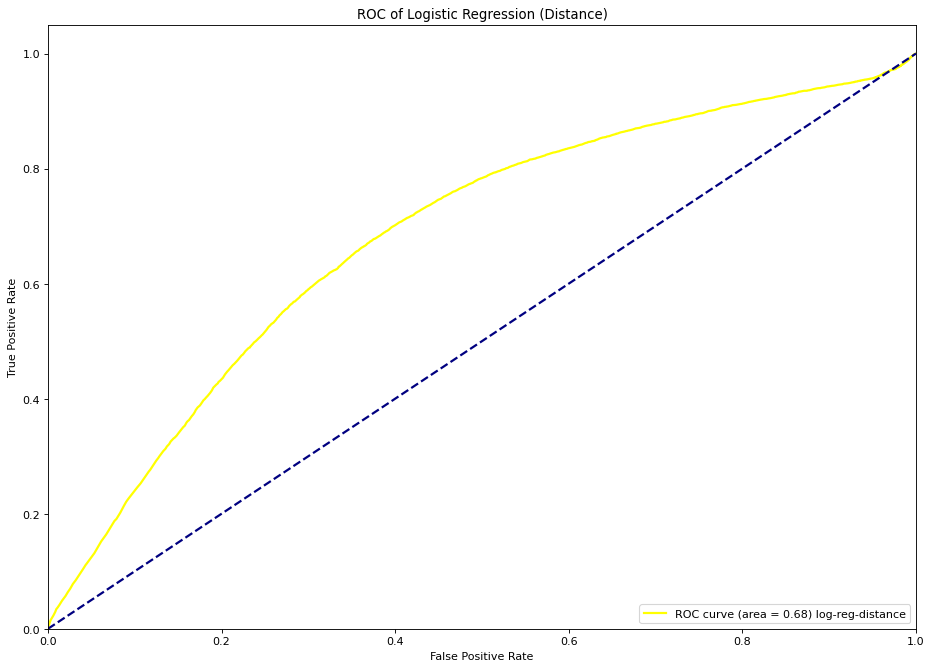

In [9]:
from sklearn.metrics import roc_curve, auc

y_score = lg.predict_proba(X_test)[:,1]
a, b, _ = roc_curve(y_test, y_score)
roc_auc_d = auc(a, b)
plt.figure()
plt.plot(
    a,
    b,
    color="yellow",
    lw=2,
    label="ROC curve (area = %0.2f) log-reg-distance" % roc_auc_d,
)
xy=[0, 1]
plt.plot(xy, xy, color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression (Distance)")
plt.legend(loc="lower right")

plt.savefig('../figures/q31_logR_ROC_distance.png')
plt.show()

A histogram of shot counts (goals and no-goals separated), binned by distance

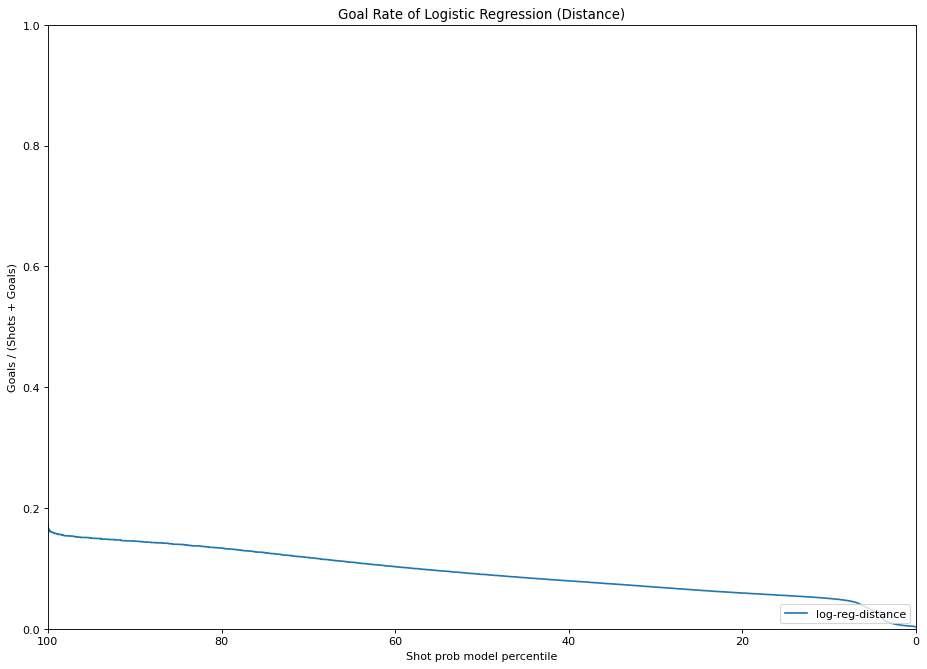

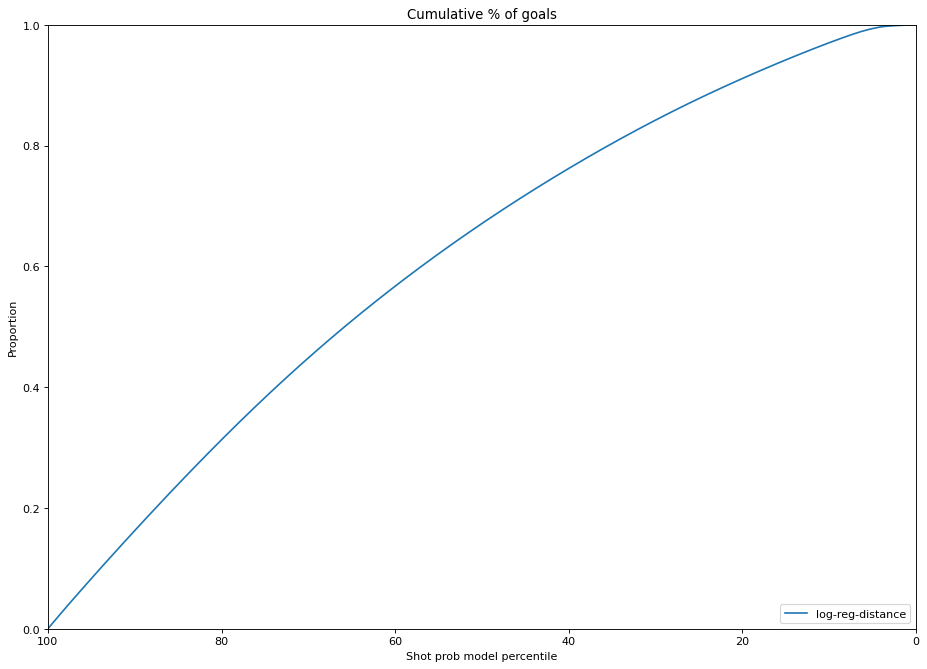

In [10]:
#model percentile
iu = lg.predict_proba(X_test)[:,1]
n = len(iu)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

iu_y = iu[::-1]
iu_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
iu_y_sum = np.cumsum(iu_y)


plt.figure()
plt.plot(
    x_axis,
    iu_y,
    label = 'log-reg-distance'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of Logistic Regression (Distance)")
plt.legend(loc="lower right")
plt.savefig('../figures/q31_logR_GR.png')
plt.show()

#cumulative plot
plt.figure()
plt.plot(
    x_axis,
    iu_y_sum/sum(iu_y),
    label = 'log-reg-distance'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.legend(loc="lower right")
plt.savefig('../figures/q31_logR_CP.png')
plt.show()

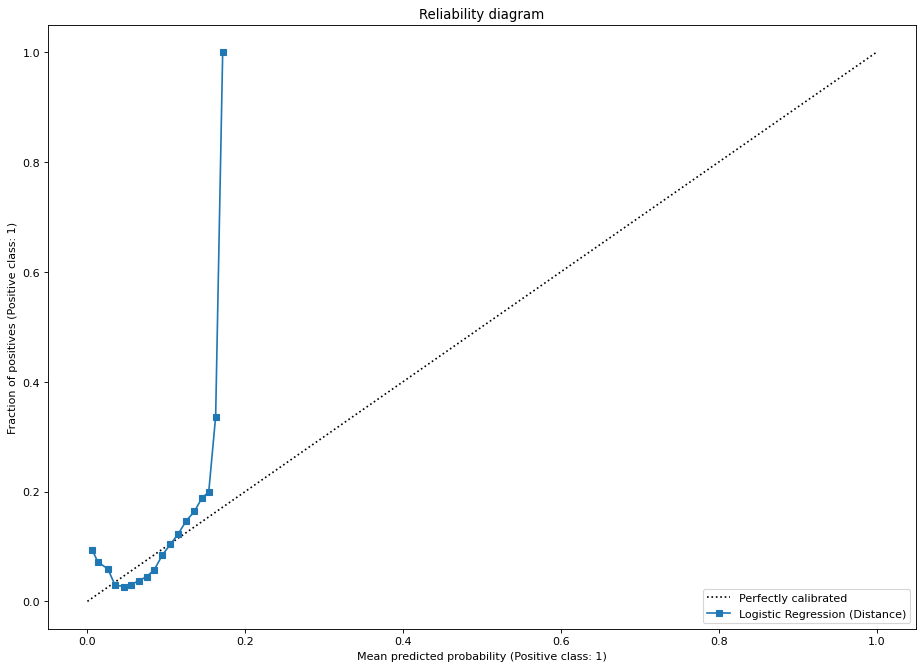

In [11]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(lg, X_test, y_test, name='Logistic Regression (Distance)', n_bins = 100)
plt.title("Reliability diagram")
plt.savefig('../figures/31_logR_RD_Distance.png')
plt.show()

In [141]:
#Logistic Regresion For angles

In [14]:
df1=pd.DataFrame(train_set[["Angle_from_net","Is_goal"]])
df=df1.dropna()
print(df)
#     train_set.drop(a)
distance_input=df["Angle_from_net"]
isGoal_output=df["Is_goal"]
X_train, X_test, y_train, y_test = train_test_split(distance_input, isGoal_output, test_size=0.3, random_state=42)
X_train= np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
lg_2=LogisticRegression()
print(X_train)
lg_2.fit(X_train,y_train)
prediction=lg_2.predict(X_test)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f = f1_score(y_test, prediction)
dump(lg_2, '../models/baseline_angle_logistic_reg.joblib')
print(lg_2.predict_proba(X_test))
lg_2.score(X_test, y_test)
print("The classification report:\n", classification_report(y_test,prediction))



        Angle_from_net  Is_goal
0            10.007980        0
1             0.000000        0
2             4.085617        0
3            46.636577        0
4             2.045408        0
...                ...      ...
331224       30.256437        1
331225       19.290046        0
331226        9.462322        0
331227        3.652223        0
331228       28.072487        1

[331209 rows x 2 columns]
[[ 5.35582504]
 [10.30484647]
 [70.34617594]
 ...
 [ 3.76403486]
 [25.51387043]
 [ 6.63251462]]
[[0.87584021 0.12415979]
 [0.87722112 0.12277888]
 [0.93247198 0.06752802]
 ...
 [0.91951723 0.08048277]
 [0.89826758 0.10173242]
 [0.87584021 0.12415979]]
The classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     89959
           1       0.00      0.00      0.00      9404

    accuracy                           0.91     99363
   macro avg       0.45      0.50      0.48     99363
weighted avg       0.82      0.91    

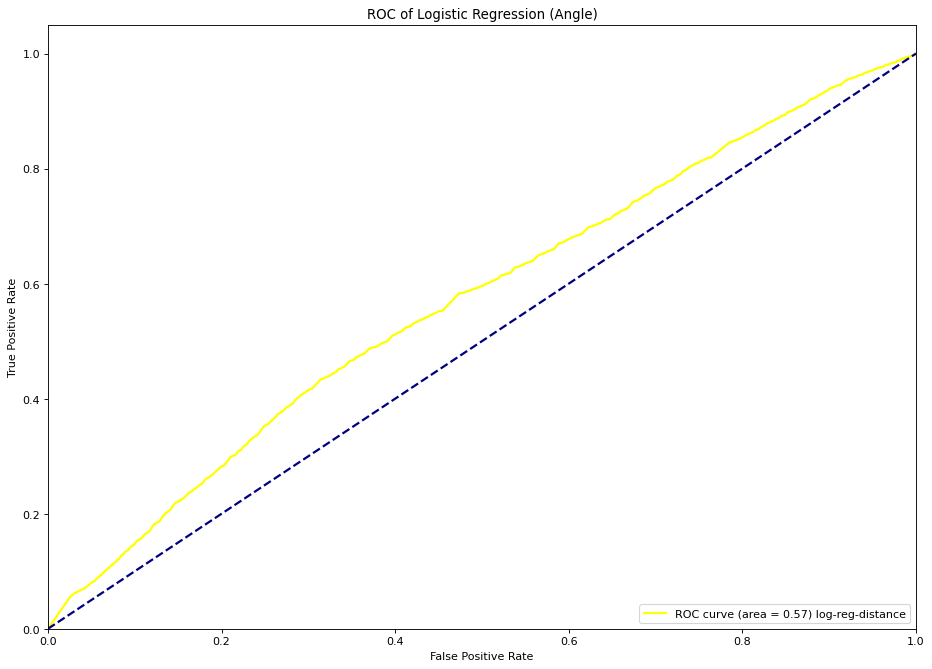

In [15]:
from sklearn.metrics import roc_curve, auc

y_score = lg_2.predict_proba(X_test)[:,1]
a, b, _ = roc_curve(y_test, y_score)
roc_auc_d = auc(a, b)
plt.figure()
plt.plot(
    a,
    b,
    color="yellow",
    lw=2,
    label="ROC curve (area = %0.2f) log-reg-distance" % roc_auc_d,
)
xy=[0, 1]
plt.plot(xy, xy, color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression (Angle)")
plt.legend(loc="lower right")

plt.savefig('../figures/q31_logR_ROC_angle.png.png')
plt.show()

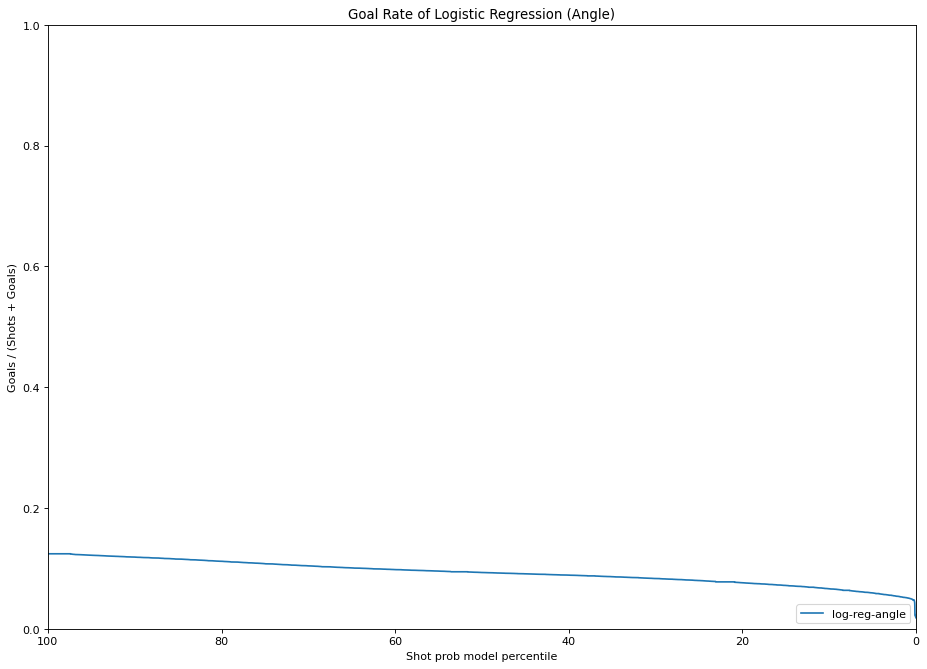

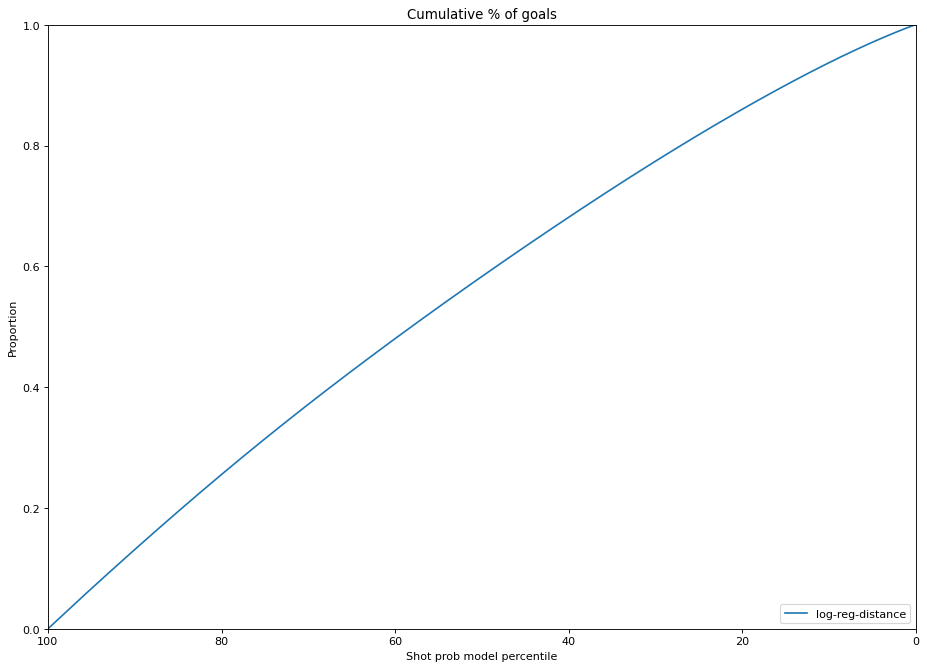

In [16]:
#model percentile
iu = lg_2.predict_proba(X_test)[:,1]
n = len(iu)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

iu_y = iu[::-1]
iu_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
iu_y_sum = np.cumsum(iu_y)


plt.figure()
plt.plot(
    x_axis,
    iu_y,
    label = 'log-reg-angle'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of Logistic Regression (Angle)")
plt.legend(loc="lower right")
plt.savefig('../figures/q31_logR_GR.png')
plt.show()

#cumulative plot
plt.figure()
plt.plot(
    x_axis,
    iu_y_sum/sum(iu_y),
    label = 'log-reg-distance'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.legend(loc="lower right")
plt.savefig('../figures/q31_logR_CP_angle.png')
plt.show()

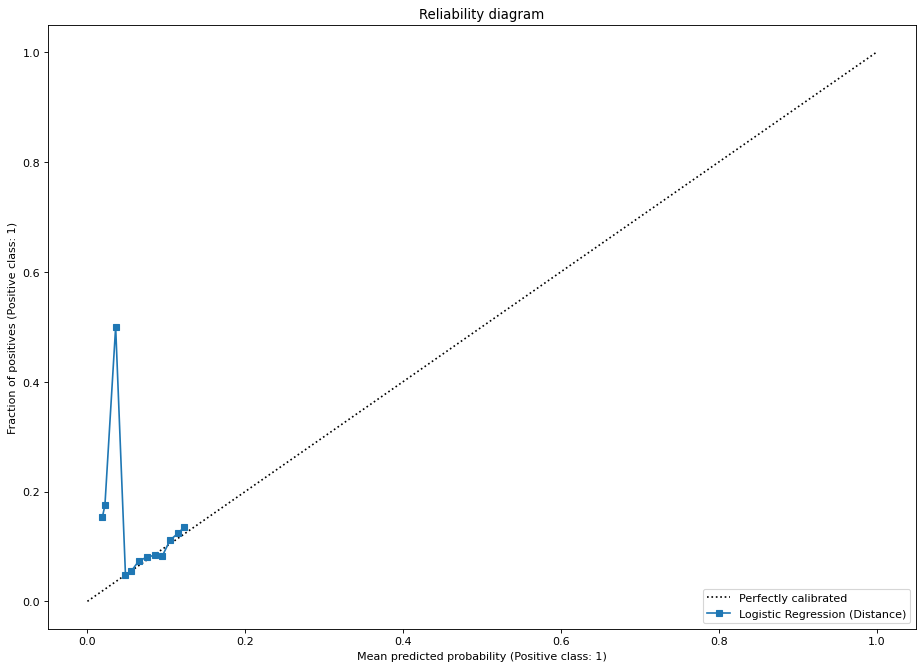

In [17]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(lg_2, X_test, y_test, name='Logistic Regression (Distance)', n_bins = 100)
plt.title("Reliability diagram")
plt.savefig('../figures/31_logR_RD_Angle.png')
plt.show()

In [18]:
df1=pd.DataFrame(train_set[["Angle_from_net","Distance_from_net","Is_goal"]])
df=df1.dropna()
x_input=df[["Angle_from_net","Distance_from_net"]]
isGoal_output=df["Is_goal"]
X_train, X_test, y_train, y_test = train_test_split(x_input, isGoal_output, test_size=0.3, random_state=42)
print(X_train)
X_train= np.array(X_train)
X_test = np.array(X_test)
lg_3=LogisticRegression()
lg_3.fit(X_train,y_train)
prediction=lg_3.predict(X_test)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f = f1_score(y_test, prediction)
dump(lg_3, '../models/baseline_distance_angle_logistic_reg.joblib')
print(lg_3.predict_proba(X_test))
lg_3.score(X_test, y_test)
print("The classification report:\n", classification_report(y_test,prediction))

        Angle_from_net  Distance_from_net
239175        5.355825          32.140317
163460       10.304846          11.180340
64672        70.346176          14.866069
209021       48.814075          10.630146
162754       25.277722          39.812058
...                ...                ...
119884       46.468801          27.586228
259194       15.255119          34.205263
131939        3.764035          76.164296
146875       25.513870          48.754487
121963        6.632515          43.289722

[231846 rows x 2 columns]
[[0.86349739 0.13650261]
 [0.90941975 0.09058025]
 [0.89971353 0.10028647]
 ...
 [0.87963251 0.12036749]
 [0.93915007 0.06084993]
 [0.78626067 0.21373933]]
The classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     89959
           1       0.00      0.00      0.00      9404

    accuracy                           0.91     99363
   macro avg       0.45      0.50      0.48     99363
weighted avg 

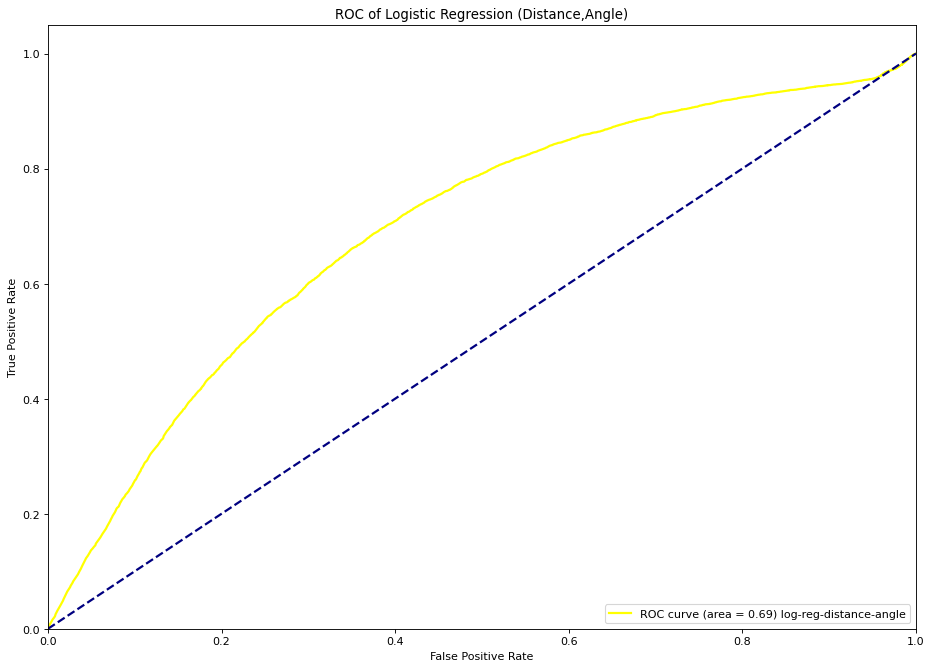

In [19]:
from sklearn.metrics import roc_curve, auc

y_score = lg_3.predict_proba(X_test)[:,1]
a, b, _ = roc_curve(y_test, y_score)
roc_auc_d = auc(a, b)
plt.figure()
plt.plot(
    a,
    b,
    color="yellow",
    lw=2,
    label="ROC curve (area = %0.2f) log-reg-distance-angle" % roc_auc_d,
)
xy=[0, 1]
plt.plot(xy, xy, color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression (Distance,Angle)")
plt.legend(loc="lower right")

plt.savefig('../figures/q31_logR_ROC_distance_angle.png.png')
plt.show()

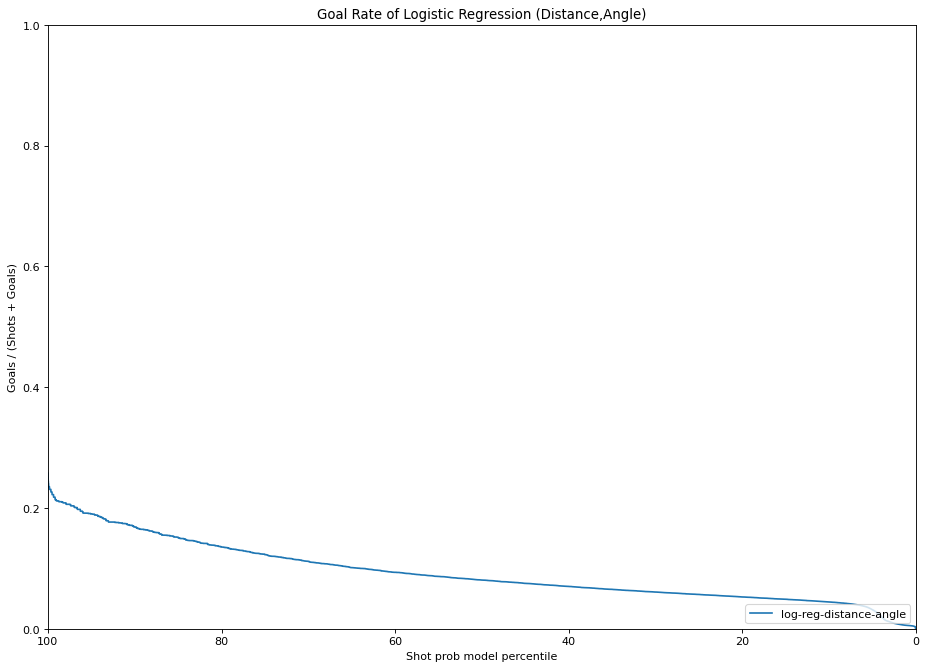

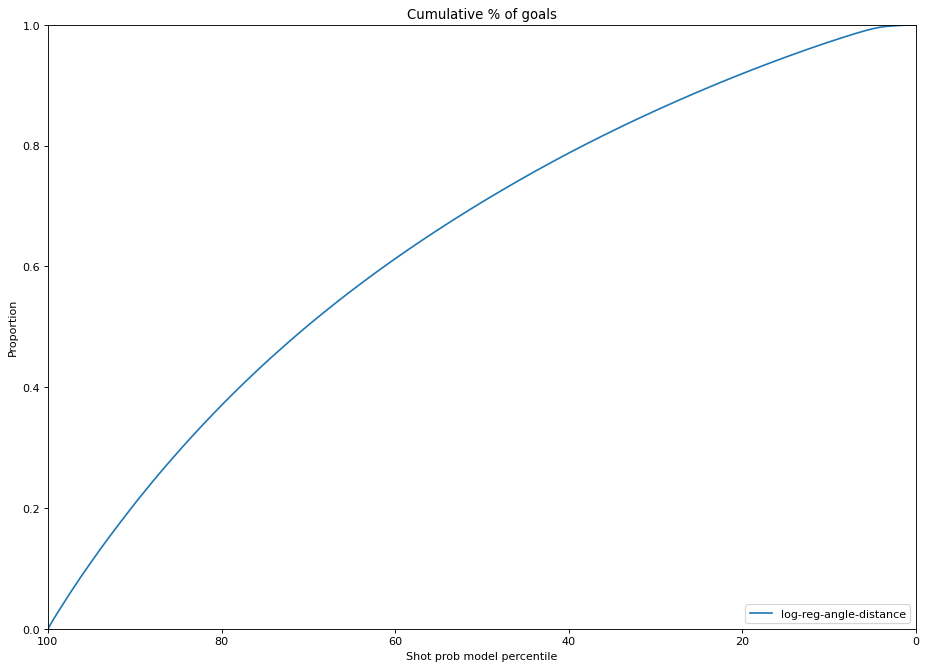

In [20]:
#model percentile
iu = lg_3.predict_proba(X_test)[:,1]
n = len(iu)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

iu_y = iu[::-1]
iu_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
iu_y_sum = np.cumsum(iu_y)


plt.figure()
plt.plot(
    x_axis,
    iu_y,
    label = 'log-reg-distance-angle'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of Logistic Regression (Distance,Angle)")
plt.legend(loc="lower right")
plt.savefig('../figures/q31_logR_GR.png')
plt.show()

#cumulative plot
plt.figure()
plt.plot(
    x_axis,
    iu_y_sum/sum(iu_y),
    label = 'log-reg-angle-distance'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.legend(loc="lower right")
plt.savefig('../figures/q31_logR_CP_distance_angle.png')
plt.show()

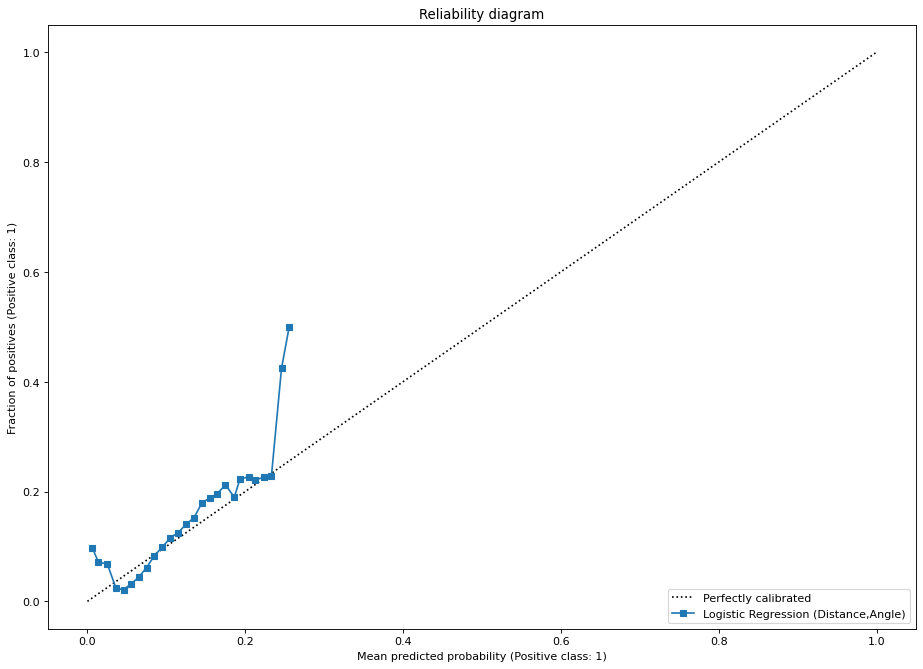

In [21]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(lg_3, X_test, y_test, name='Logistic Regression (Distance,Angle)', n_bins = 100)
plt.title("Reliability diagram")
plt.savefig('../figures/31_logR_RD_distance_Angle.png')
plt.show()